# Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 7
sb.set_style('whitegrid')

In [3]:
address = 'C:/Users/Beedoo/Desktop/Data/enrollment_forecast.csv'
enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'income']
enroll.head()

,year,roll,unem,hgrad,income
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


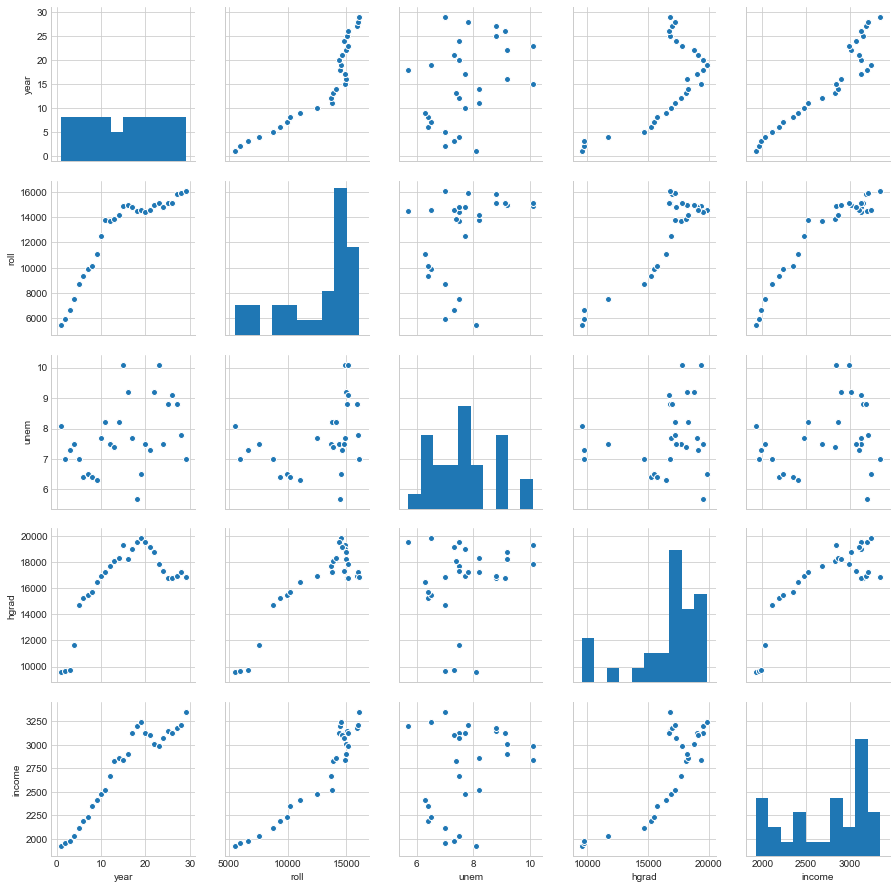

In [4]:
sb.pairplot(enroll)

In [5]:
enroll.corr()

,year,roll,unem,hgrad,income
year,1.000000,0.900934,0.378305,0.670300,0.944287
roll,0.900934,1.000000,0.391344,0.890294,0.949876
unem,0.378305,0.391344,1.000000,0.177376,0.282310
hgrad,0.670300,0.890294,0.177376,1.000000,0.820089
income,0.944287,0.949876,0.282310,0.820089,1.000000


In [9]:
enroll_data = enroll.iloc[:, enroll.columns.get_indexer(['unem', 'hgrad'])]
enroll_data_names = ['unem', 'hgrad']
enroll_data.head()

,unem,hgrad
0,8.1,9552
1,7.0,9680
2,7.3,9731
3,7.5,11666
4,7.0,14675


In [8]:
enroll_target = enroll.iloc[:, enroll.columns.get_loc('roll')]
enroll_target_name = ['roll']
enroll_target.head()

0    5501
1    5945
2    6629
3    7556
4    8716
Name: roll, dtype: int64

In [10]:
X = scale(enroll_data)
y = enroll_target

In [12]:
missing_values = X==np.NAN
X[missing_values==True]

array([], dtype=float64)

In [13]:
LinReg = LinearRegression(normalize=True)
LinReg.fit(X, y)
Rsquared = LinReg.score(X, y)
print(Rsquared)

0.8488812666133723
